In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
school_data_path = os.path.join('school_data.csv')

In [3]:
school_data_df = pd.read_csv(school_data_path)

In [4]:
# school_data_df = school_data_df.dropna()

In [21]:
school_data_df.head()

,Unnamed: 0,_id,city,enrollment,graderange,gsrating,lat,lon,parentrating,phone,school_name,school_type,website
0,0,5af7493818e4261b6296a900,Adelanto,469.0,K-6,1.0,34.576157,-117.409490,3,(760) 246-5892,Adelanto Elementary School,public,http://www.aesd.net/
1,1,5af7493818e4261b6296a901,Adelanto,1750.0,9-12,NaN,34.531548,-117.441284,3,(760) 246-3909,Adelanto High School,public,http://ahs.vvuhsd.org/
2,2,5af7493818e4261b6296a902,Adelanto,NaN,1-12,NaN,34.519000,-117.406230,3,(760) 530-1576,Carpe Diem Learning Academy,private,NaN
3,3,5af7493818e4261b6296a903,Adelanto,391.0,7-8,1.0,34.511086,-117.434700,3,(760) 530-1950,Columbia Middle School,public,NaN
4,4,5af7493818e4261b6296a904,Adelanto,512.0,K-6,NaN,34.537495,-117.460600,2,NaN,Desert Trails Elementary School,charter,NaN


In [22]:
# save the Series as a csv file
school_data_df.to_csv("school_data_clean.csv",index=False)

In [23]:
city_df = school_data_df.groupby('city')

In [24]:
average_enrollment = city_df['enrollment'].mean()
average_rating = city_df['parentrating'].mean()
school_type = city_df['school_type'].unique()
graderange = city_df['graderange'].unique()
school = city_df['school_name'].unique()
gsrating = city_df['gsrating'].mean()

In [25]:
city_group = pd.DataFrame({'enrollment':average_enrollment,
                           'parentrating':average_rating,
                           'school_type':school_type,
                          'graderange':graderange,
                          'school_name':school,
                          'gsrating':gsrating})

In [26]:
city_group.head()

,enrollment,graderange,gsrating,parentrating,school_name,school_type
city,,,,,,
Adelanto,677.333333,"[K-6, 9-12, 1-12, 7-8, PK-6, K-8, K-12]",1.888889,3.666667,"[Adelanto Elementary School, Adelanto High Sch...","[public, private, charter]"
Agoura Hills,155.250000,"[K, K-8, PK-5, K-1, K-5]",8.000000,4.600000,"[Born Learners School, Conejo Jewish Day Schoo...","[private, public]"
Alameda,424.629630,"[K-8, 6-12, 9-12, K-5, K-12, K-3, 1-12, K-6, 6...",7.333333,4.297297,"[Alameda Christian School, Alameda Community L...","[private, charter, public]"
Albany,568.000000,"[9-12, 6-8, K-5, 10-12, 6-12 & ungraded]",9.600000,4.000000,"[Albany High School, Albany Middle School, Cor...","[public, private]"
Alhambra,574.086957,"[9-12, PK-4, PK-5, K-8, K-12, K, PK-6]",7.272727,3.833333,"[Alhambra High School, All Souls Elementary Sc...","[public, private]"


In [27]:
def remove_from_list(x):
    x = x[0]
    return x

In [28]:
city_group["school_type"] = city_group["school_type"].apply(remove_from_list)

In [29]:
# city_group["school_type"] = city_group["school_type"].apply(remove_from_list)

In [30]:
public_group = city_group.loc[city_group['school_type'] == 'public']
pub_avgenroll = public_group['enrollment']
pub_avgparent = public_group['parentrating']
pub_gs = public_group['gsrating']

charter_group = city_group[city_group['school_type'] == 'charter']
char_avgenroll = charter_group['enrollment']
char_avgparent = charter_group['parentrating']
char_gs = charter_group['gsrating']

private_group = city_group[city_group['school_type'] == 'private']
pri_avgenroll = private_group['enrollment']
pri_avgparent = private_group['parentrating']
pri_gs = private_group['gsrating']

In [31]:
private_group.head()

,enrollment,graderange,gsrating,parentrating,school_name,school_type
city,,,,,,
Agoura Hills,155.250000,"[K, K-8, PK-5, K-1, K-5]",8.000000,4.600000,"[Born Learners School, Conejo Jewish Day Schoo...",private
Alameda,424.629630,"[K-8, 6-12, 9-12, K-5, K-12, K-3, 1-12, K-6, 6...",7.333333,4.297297,"[Alameda Christian School, Alameda Community L...",private
Aliso Viejo,760.000000,"[K-1, 9-12, K-8, 6-8, K-5, 1-12, K-6, 3-12, PK...",7.875000,4.000000,"[Academy On The Hills, Aliso Niguel High Schoo...",private
Anaheim,722.228261,"[1-12, K-8, K-6, K-5, 7-12, 6-12, 9-12, PK-5, ...",4.693548,3.959350,"[Acaciawood School, Inc., Adventure Schooling,...",private
Anaheim Hills,266.500000,"[PK-6, K-3, PK-8]",NaN,3.333333,"[AmeriMont Academy, Canyon Montessori Center, ...",private


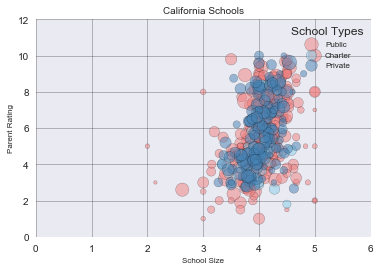

In [34]:
plt.scatter(x=pub_avgparent, y=pub_gs, s=pub_avgenroll/5, c='lightcoral',edgecolors='black', alpha=0.5)
plt.scatter(x=char_avgparent, y=char_gs, s=char_avgenroll/5, c='skyblue',edgecolors='black', alpha=0.5)
plt.scatter(x=pri_avgparent, y=pri_gs, s=pri_avgenroll/5, c='steelblue',edgecolors='black', alpha=0.5)

plt.legend(['Public','Charter', 'Private'],title=('School Types'),loc='upper right', fancybox=True,fontsize=8)

plt.title('California Schools',fontsize=10)

plt.xlabel('School Size',fontsize=8)
plt.ylabel('Parent Rating',fontsize=8)

plt.xlim(0,6)
plt.ylim(0,12)

plt.grid(color='black',alpha=0.25)
plt.figure(figsize=(12,12))

plt.text(42, 30, 'Note: Circle size correlates to school size', fontsize=10)

sns.set()

plt.show()

In [61]:
city_group.to_csv("city_school.csv",index=False)